"""<br>
@Author: Prayag Bhoir<br>
@Date: 03-10-2024<br>
@Last Modified by: Prayag Bhoir<br>
@Last Modified time: 03-10-2024<br>
@Title : Python programs on Logistic Regression to predict user will click the ad or not 
based on his experience and estimated salary for a given dataset.<br>
"""

In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pylab as plt

<h2>Load the dataset </h2>

In [102]:
url = 'https://drive.google.com/uc?id=1I8KsCufEa47XvzrkxhntEWSy1Su0E0NY'
df = pd.read_csv(url)
#check the data
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [103]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


<h2>Check the outliers and correlation</h2>

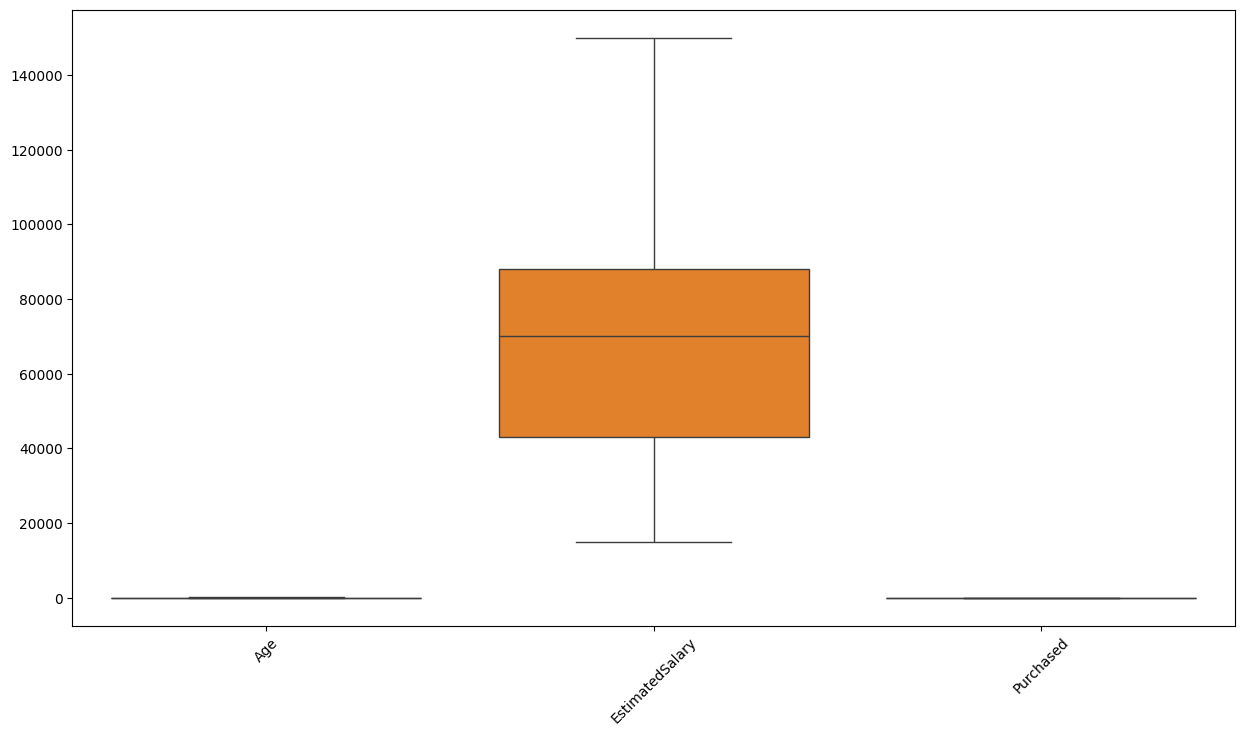

In [105]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df.drop(['User ID', 'Gender'], axis=1))
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

<h2>Observations</h2>
	<li>There is no as such outliers</li>


<Axes: >

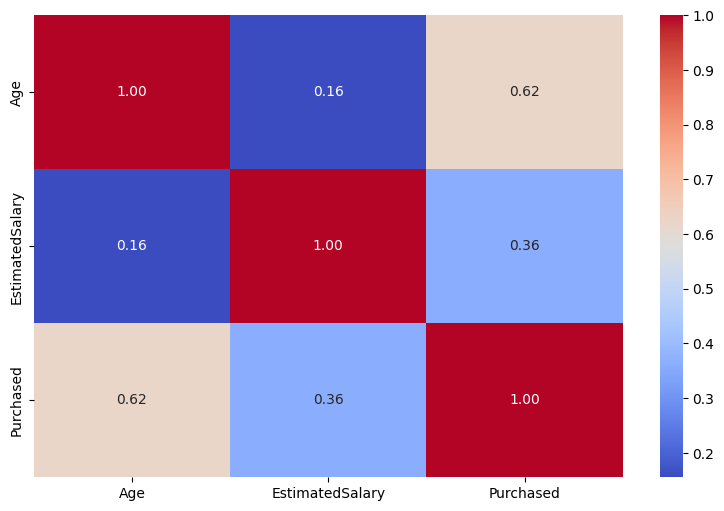

In [106]:
plt.figure(figsize=(9.5,6))
sns.heatmap(df.drop(['User ID', 'Gender'],axis=1).corr(), annot=True, fmt='.2f', cmap='coolwarm')

<h2>Observations</h2>
	<li>The orange and redesh shades has high correlation with the Purchased</li>


<h2>Saperate the features</h2>


In [107]:
X = df[['Age', 'EstimatedSalary']]
y = df[['Purchased']]
#Check the data
X.head(),y.head()

(   Age  EstimatedSalary
 0   19            19000
 1   35            20000
 2   26            43000
 3   27            57000
 4   19            76000,
    Purchased
 0          0
 1          0
 2          0
 3          0
 4          0)

<h2>Observations</h2>
	<li>There is a scale difference between the Age and EstimatedSalary</li>


<h2>Scale the X features</h2>

In [108]:
scaler_x = StandardScaler()

In [109]:
X_scaled = scaler_x.fit_transform(X)

In [110]:
display(X_scaled)

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

<h2>Split the dataset into training and testing</h2>


In [111]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [112]:
display(X_test)
display(y_test)

array([[ 0.79705706, -1.40195167],
       [ 2.03872775,  0.53612887],
       [-0.92217926, -0.75592482],
       [ 0.98808332,  0.77104772],
       [-0.82666613, -1.22576253],
       [-0.73115301, -0.2273574 ],
       [ 0.89257019,  1.09406114],
       [-0.82666613,  0.38930459],
       [ 0.22397829,  0.15438573],
       [ 0.41500455, -0.13926283],
       [-0.25358736, -0.13926283],
       [ 1.46564897, -1.04957339],
       [-1.39974491, -0.63846539],
       [-1.6862843 , -1.37258681],
       [-0.73115301,  0.50676401],
       [-0.25358736,  1.123426  ],
       [ 1.37013584, -0.93211396],
       [ 0.79705706,  0.12502088],
       [ 0.12846516, -0.81465453],
       [ 1.75218836, -0.28608712],
       [-1.49525804, -1.25512738],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.37258681],
       [ 2.03872775,  0.18375059],
       [-1.78179743, -1.49004624],
       [ 1.27462271, -1.37258681],
       [ 0.41500455,  0.30121002],
       [-0.0625611 , -0.49164111],
       [ 1.65667523,

,Purchased
209,0
280,1
33,0
210,1
93,0
...,...
246,0
227,1
369,1
176,0


<h2>Build the model</h2>

In [113]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\bhoir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

<h2>Make prediction on test data.</h2>

In [114]:
y_pred = model.predict(X_test)

<h2>Evaluating the model</h2>

In [115]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [116]:
print(f"The accuracy is :{accuracy}\n{conf_matrix} \n{class_report}")

The accuracy is :0.8625
[[50  2]
 [ 9 19]] 
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80



In [127]:
temp = scaler_x.inverse_transform(X_test)

In [146]:
#fetch the 1st row in test data for testing
temp[0]

array([   46., 22000.])

<h2>Check the prediction<h2>

In [117]:
model.predict(scaler_x.transform([[27,	57000]]))

C:\Users\bhoir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])